<h1>Curvefitting with Stochastic Gradient Descent From First Principals</h1>

In this notebook, I implement the stochastic gradient descent (SGD) algorithm from first principals in order to fit polynomials of various orders to different sets of randomly generated datapoints

First, the required modules are imported:

In [318]:
import numpy as np
import matplotlib.pyplot as plt

Setting a seed so that randomly generated values can be deterministically reproduced

In [319]:
np.random.seed(42)

Defining a function called 'polyModelWithNoise' to calculate a polynomial given by:

$$ y(x) = \left( \sum_i \theta_i x^i \right) + noise

\equiv y(x) = (2x) + noise
$$

where the noise follows a normal distribution.

The function is then used to generate a sample of 100 linearly spaced linear polynomial datapoints between 0 and 1, with $\theta = [0,2]$ and standard deviation, $\sigma$ of the noise = 0.5

In [320]:
def polyModelWithNoise(x,theta,sigma):
    """
    A function that is used to generate a polynomial model with noise

    Args:
        x (numpy array):            Sample of x values
        theta (array):              Polynomial parameters
        sigma (float):              St. Dev of the noise

    Returns:
        'y + noise' (numpy array):  y values with noise
    """
    # Noise distribution
    noise = np.random.normal(0,sigma,len(x))
    
    # Performing 'all-in-one' theta coeff multiplication and summation over all indices
    y = np.polyval(theta[::-1],x)   # theta array needs to be in rev. order due to how polyval function works

    return y + noise

Plotting 100 linear polynomial datapoints:

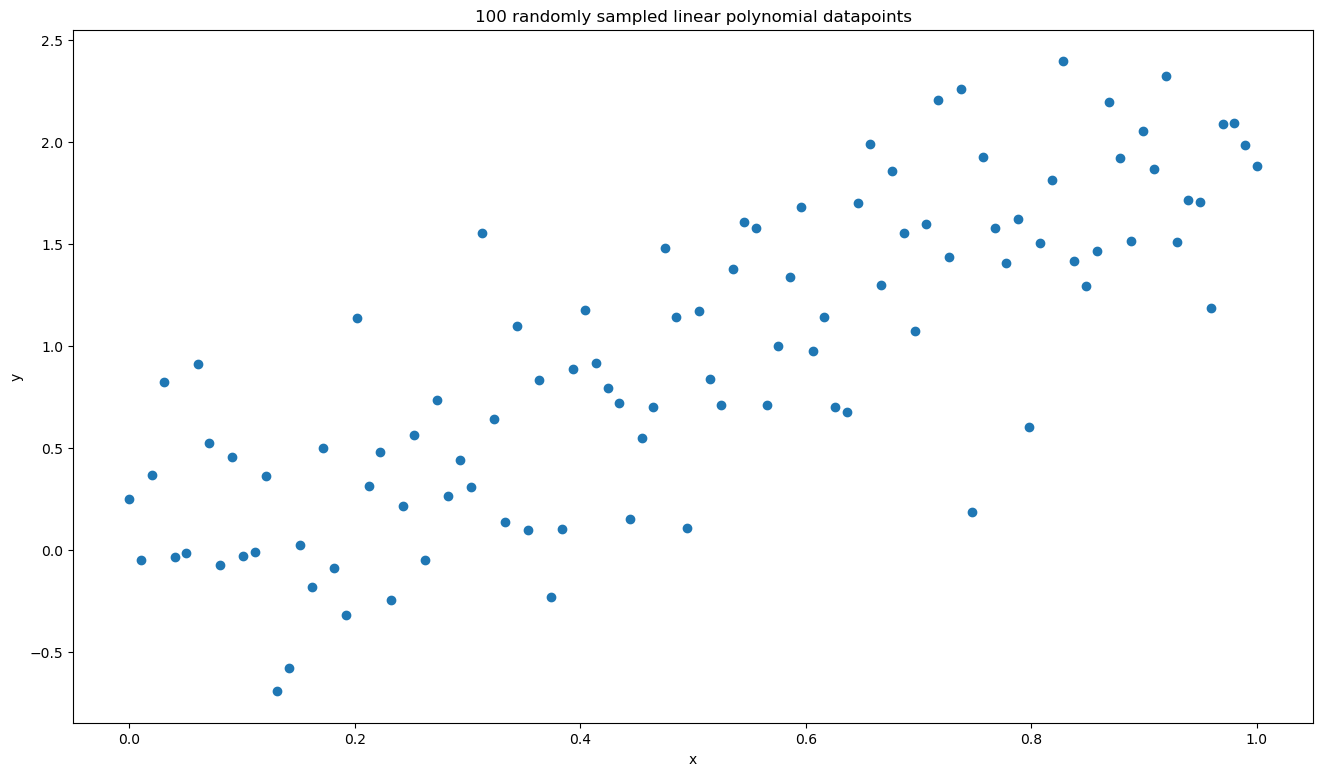

In [321]:
# Defining required params
theta = np.array([0,2])
sigma = 0.5
x = np.linspace(0,1,100)
y = polyModelWithNoise(x,theta,0.5)

# Plotting the sample of 100 points
plt.figure(figsize=(16,9))
plt.scatter(x,y)
plt.title('100 randomly sampled linear polynomial datapoints')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Defining a function called 'polyGradient' that will calculate and return the gradient of the polynomial wrt $\theta_i$

Using the fact that the polynomial is given by:

$$ y(x) = \left( \sum_i \theta_i x^i \right) + noise$$

it is then clear that the gradient of the polynomial wrt the 'i-th' value of theta, $\theta_i$ is given by:

$$ \frac{\partial y(x)}{\partial \theta_i} = x^i $$

In [322]:
def polyGradient(x,theta):
    '''
    Function that is used to calculate the gradient of a 
    polynomial function wrt some theta parameters
    
    Args:
        x (numpy array):            x values
        theta (array):              Polynomial parameters
    
    Returns:
        'gradient' (numpy array):   values of gradient for each x value wrt theta
    '''
    # Initialising an array to define the powers used in calculation of the gradient
    powers = np.arange(len(theta))

    # Broadcasting 'powers' array to 'x' array in order to create a 2D array that
    # stores gradient values wrt theta
    gradient = x ** powers[:, np.newaxis]
    
    return gradient

### TO TEST FUNCTIONALITY OF polyGradient
#polyGradient(x,theta)

Now I will implement the stochastic gradient decent algoithm in order to determine values of $\theta$ that minimise the loss function of choice, (fake) $\chi^2$, which is given by:

$$ \chi^2 = \sum_i \left(\frac{x_{i}-\mu}{\sigma}\right)^2 $$

To find the local minimum, a value of $\theta$ that is in the direction of the negative gradient is determined by:

$$ \theta_{i+1} = \theta_{i} - \eta_i  \left< \Delta f\right> \frac{\partial f}{\partial \theta} $$

where $\eta_i$ is the learning rate (step size), $\left< \Delta f\right>$ is the average of the difference between the model and actual function values determined from a subset of data (sampled between 0 and 1).

For this task: 
- A learning rate of 0.5 is used.
- Initial $\theta_i$ values used are: [-1, 0.5]
- Actual $\theta_i$ values (truth parameters) are: [0, 2]

*Note: Throughout this assignment, Stochastic Gradient Descent algorithm will loop 100 times

In [323]:
def stochastic_grad_desc(steps,initTheta,actualTheta,sigmaActual,LR=0.5):
    """
    Function that performs a stochastic gradient descent in order to determine optimal fit parameters

    ARGS:
        steps (int):                Number of the stochastic gradient descent will take
        LR (float):                 Learning rate (eta) (default = 0.5)
        initTheta (numpy array):    Array of valueswhat containing the initial values of theta
        actualTheta (numpy array):  Array of the actual values of theta
        sigmaActual (float):        St. Dev of the random noise distribution in datapoints

    Returns:
        thetaArray (numpy array):   Array of theta values obtained from each iteration of this function
        Chi2Array (numpy array):    Array of (fake) Chi2 values obtained from each iteration of this function
    """
    thetaArray = np.zeros((steps + 1, len(initTheta)))
    thetaArray[0] = initTheta
    Chi2Array = np.zeros((steps, len(initTheta)))

    for i in range(steps):
        # Calculating difference between actual and model y vals for every iteration
        xsample = np.random.uniform(0,1,10)
        yModel = polyModelWithNoise(xsample,initTheta,0)    # Model values have are without noise
        yActual = polyModelWithNoise(xsample,actualTheta,sigmaActual)
        deviation = yModel - yActual

        # Determining new value of theta in iteration
        df = polyGradient(xsample,initTheta)
        initTheta -= LR * np.mean(deviation[np.newaxis,:] * df, axis = 1)
        thetaArray[i+1] = initTheta

        # Determining values of (fake) Chi2 for the determined fit 
        # as values of theta0 and theta1 evolve with each iteration
        Chi2Array[i] = np.sum(np.power(deviation/sigmaActual,2))
    
    return thetaArray, Chi2Array

Carrying out a stochastic gradient descent using the parameters specified in the markdown (MD) cell above:

In [324]:
# Calling the above function to extract theta0, theta1 and fake chi2 values
thetaArray, Chi2Array = stochastic_grad_desc(100,[-1,0.5],[0,2],0.5)

# Array of calculated theta values to be used for fitting (the final theta
# values obtained from Stochastic Grad. Desc. Algorithm)
thetaArray_final = thetaArray[-1]

print(f'Final theta (θ) values:\n'
      f'θ_0 = {thetaArray_final[0]}\n'
      f'θ_1 = {thetaArray_final[1]}\n')

print(f'Final chi^2 (χ2) values:\n'
      f'χ2_0 = {Chi2Array[-1,0]}\n'
      f'χ2_1 = {Chi2Array[-1,1]}')

Final theta (θ) values:
θ_0 = 0.031783624068236066
θ_1 = 2.033758907060087

Final chi^2 (χ2) values:
χ2_0 = 6.694922017442591
χ2_1 = 6.694922017442591


The code cell below is used to plot the following:

- 1st order polynomial fit line (trained over an x-range of [0,1]) obtained from the stochastic grad descent (SGD) overlayed on the previously determined linear polynomial datapoint sample
- Evolution of $\theta_i$ values from inital guess with each step of the SDG taken
- The $\chi^2$ values determined for each iteration of the SGD

These are all shown under the code cell below.

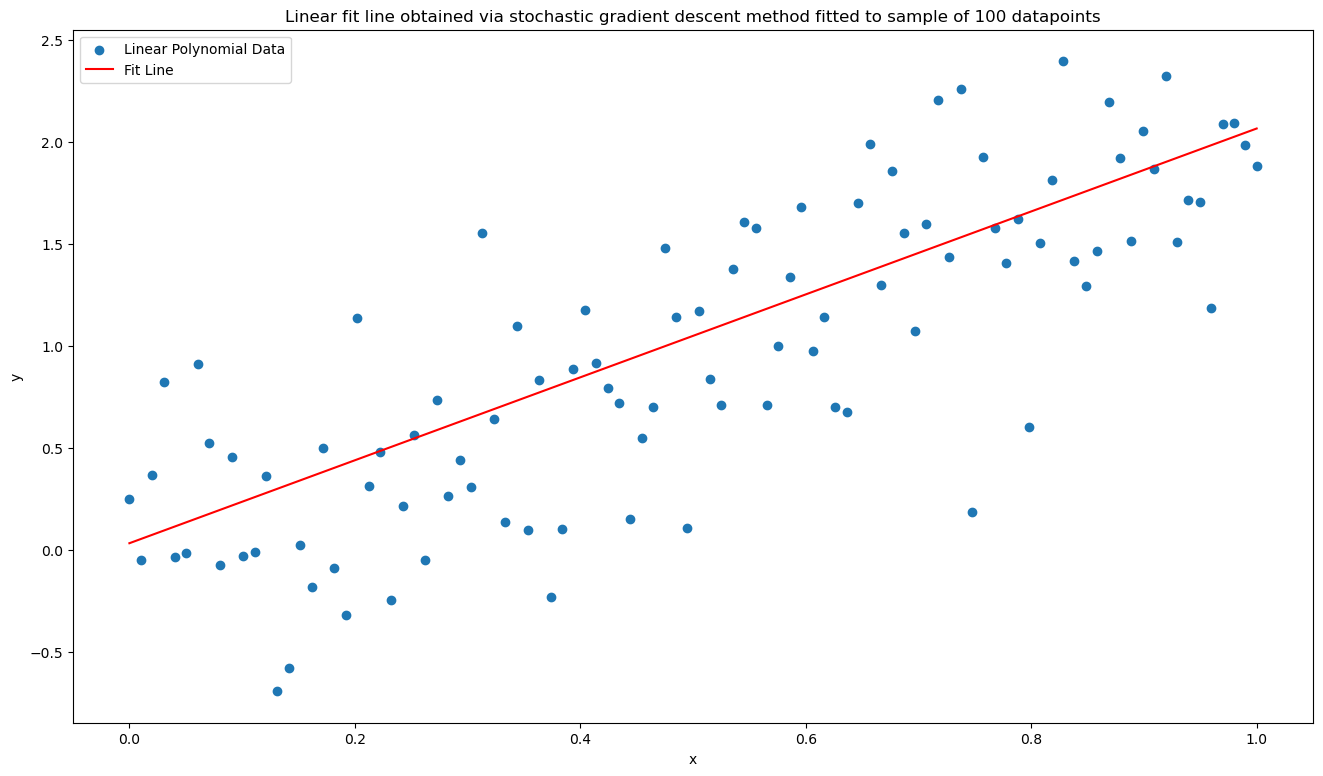

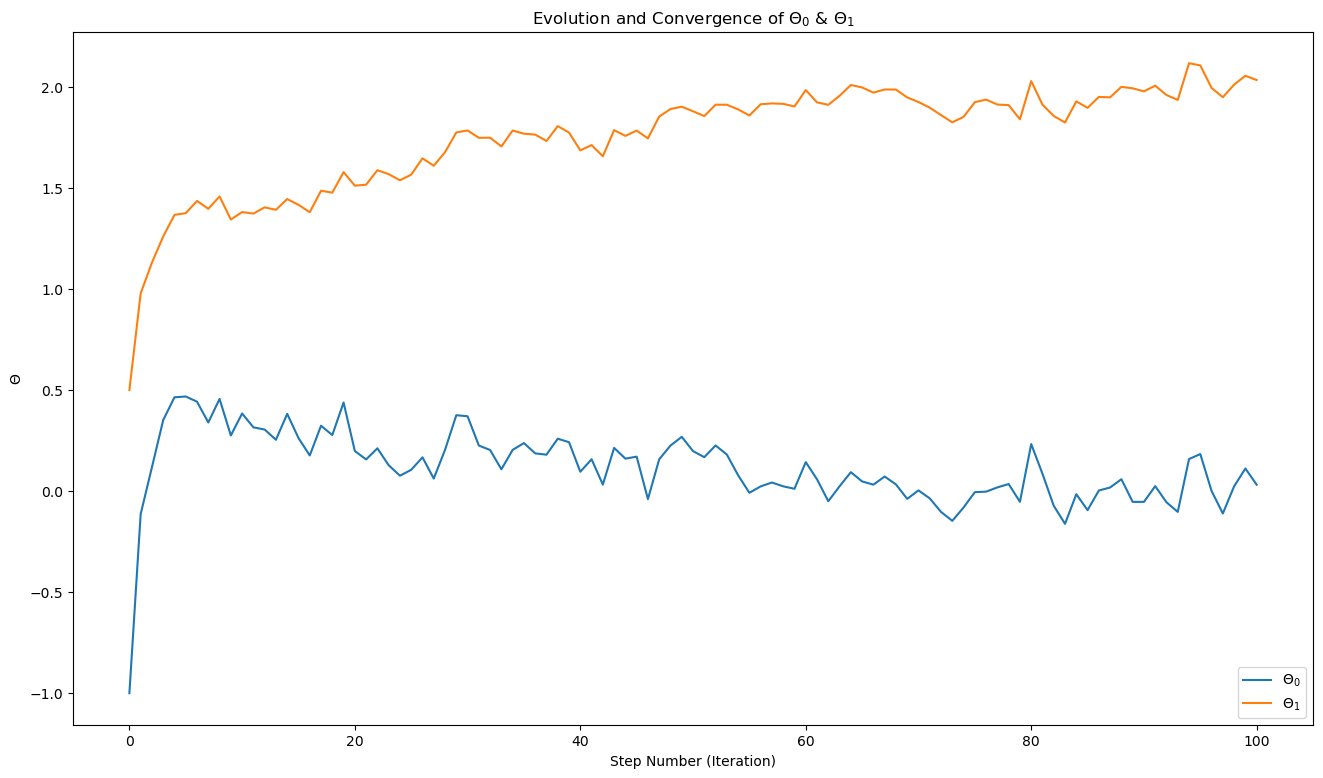

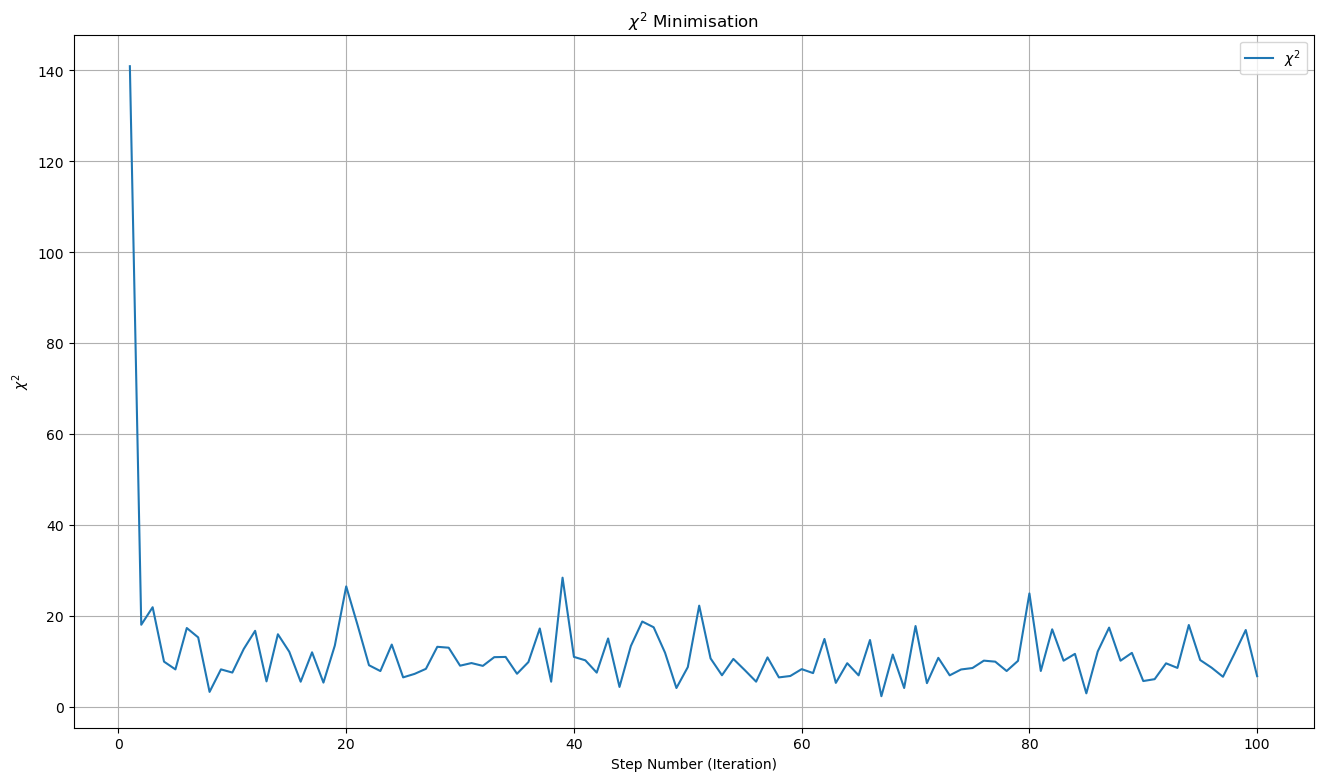

In [325]:
# Plotting 1st order polynomial fit line obtained via stochastic gradient descent to 1st order polynomial data
plt.figure(figsize=(16,9))
plt.scatter(x,y,label='Linear Polynomial Data')
plt.plot(np.linspace(0,1,100), polyModelWithNoise(x,thetaArray_final,0), color='r', label='Fit Line')   # Fit line data has no noise
plt.title('Linear fit line obtained via stochastic gradient descent method fitted to sample of 100 datapoints')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Plotting the evolution of the theta values
# for each iteration of the stochastic gradient descent algorithm
plt.figure(figsize=(16,9))
plt.plot(np.linspace(0,100,101), thetaArray[:,0], label='$\Theta_0$')
plt.plot(np.linspace(0,100,101), thetaArray[:,1], label='$\Theta_1$')
plt.title('Evolution and Convergence of $\Theta_0$ & $\Theta_1$')
plt.legend(loc='lower right')
plt.xlabel('Step Number (Iteration)')
plt.ylabel('$\Theta$')
plt.show()

# Plot of the minimisation of chi2 (evolution of chi2 as step number increaases)
plt.figure(figsize=(16,9))
plt.plot(np.linspace(1,100,100), Chi2Array[:,0], label='$\chi^2$')
plt.title('$\chi^2$ Minimisation')
plt.legend()
plt.xlabel('Step Number (Iteration)')
plt.ylabel('$\chi^2$')
plt.grid()
plt.show()

I will now be implementing the SGD algorithm to fit to 3rd order polynomial data (with x-range [-0.5,1.5]) with $\theta$ values (truth parameters): [0,2,2,2] with the same noise ($\sigma$ = 0.5) as before

In particular, I will be fitting:
- 1st order (initial $\theta$ = [-1,0.5])
- 3rd order (initial $\theta$ = [-1,0.5,0.5,0.5])
- 7th order (initial $\theta$ = [-1,0.5,0.5,0.5,0.5,0.5,0.5,0.5])

polynomials trained over an x-range of [0,1] to this 3rd order polynomial data.

I will then be plotting these fit curves with the 3rd order datapoints.

*Note: The learning rate ($\eta$) and iterations used in these implementation of the SGD alorithm are the same as those used in the previous task.

In [326]:
# Defining parameters to be used
actualtheta = np.array([0,2,2,2])
actualsigma = 0.5

# Generating 3rd order polynomial data with noise required x-range
xdata = np.linspace(-0.5,1.5,100)
ydata = polyModelWithNoise(xdata,actualtheta,actualsigma)

# Defining 1st, 3rd, 7th order initial theta value arrays
initTheta_1st = np.array([-1,0.5])
initTheta_3rd = np.array([-1,0.5,0.5,0.5])
initTheta_7th = np.array([-1,0.5,0.5,0.5,0.5,0.5,0.5,0.5])

In [327]:
# Implementing the stochastic grad. desc. algoithm to fit a:
# 1st, 3rd, 7th order polynomial to 3rd order polynomial data
thetaArray_1st, _ = stochastic_grad_desc(100,initTheta_1st,actualtheta,actualsigma)
thetaArray_3rd, _ = stochastic_grad_desc(100,initTheta_3rd,actualtheta,actualsigma)
thetaArray_7th, _ = stochastic_grad_desc(100,initTheta_7th,actualtheta,actualsigma)

# Array of calculated theta values to be used for fitting
thetaArray_1st_final = thetaArray_1st[-1]
thetaArray_3rd_final = thetaArray_3rd[-1]
thetaArray_7th_final = thetaArray_7th[-1]

Text(0, 0.5, 'y')

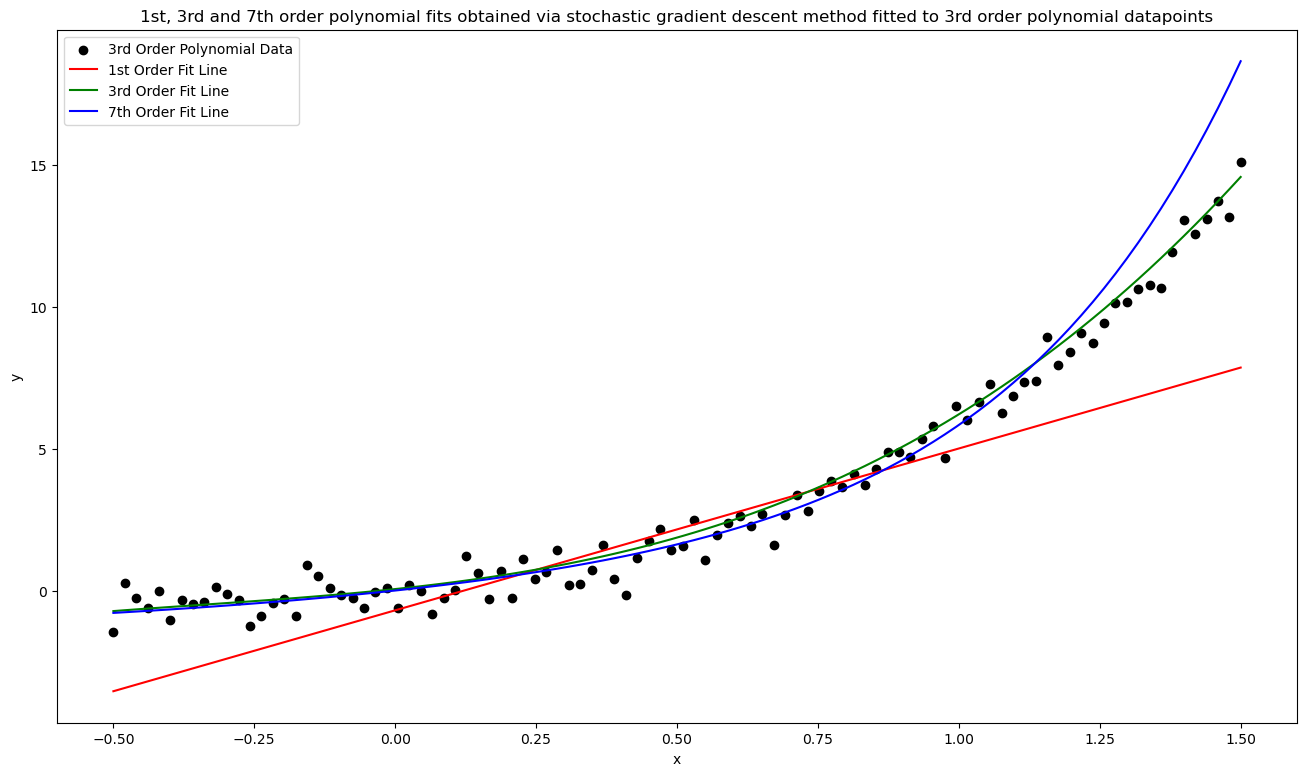

In [328]:
# Plotting 1st, 3rd, 7th order polynomial fit lines obtained via stochastic gradient descent to 3rd order polynomial data
plt.figure(figsize=(16,9))

plt.scatter(xdata,ydata,color='k',label='3rd Order Polynomial Data')

plt.plot(np.linspace(-0.5,1.5,100), polyModelWithNoise(xdata,thetaArray_1st_final,0), color='r', label='1st Order Fit Line')
plt.plot(np.linspace(-0.5,1.5,100), polyModelWithNoise(xdata,thetaArray_3rd_final,0), color='green', label='3rd Order Fit Line')
plt.plot(np.linspace(-0.5,1.5,100), polyModelWithNoise(xdata,thetaArray_7th_final,0), color='blue', label='7th Order Fit Line')

# Adding title, labels, legend
plt.title('1st, 3rd and 7th order polynomial fits obtained via stochastic gradient descent method fitted to 3rd order polynomial datapoints')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

By looking at the figure above, it is clear that in the x-range that the best-fit models were trained in (x = [0,1]), all 3 models fit the (3rd order) data to a reasonably good standard.

However, when considering the entire x-range in which there are 3rd order polynomial datapoints (including beyond the range in which the models were not trained in), it is obvious that only the 3rd order best-fit model provides an accurate fit to the data.